In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt
import scipy.stats as stats
sns.set(style="ticks")
plt.style.use('seaborn-dark')

In [4]:
%cd C:\Users\vikas\OneDrive\Documents\Bussiness Analytics\Python\Assignment\Python Foundation Case Study 3 - Insurance Claims Case Study

C:\Users\vikas\OneDrive\Documents\Bussiness Analytics\Python\Assignment\Python Foundation Case Study 3 - Insurance Claims Case Study


In [5]:
%pwd

'C:\\Users\\vikas\\OneDrive\\Documents\\Bussiness Analytics\\Python\\Assignment\\Python Foundation Case Study 3 - Insurance Claims Case Study'

In [6]:
cust_demographics=pd.read_csv("cust_demographics.csv")
claims=pd.read_csv("claims.csv")

## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view ofthe data. Use the same for the subsequent questions.

In [7]:
cust_360=pd.merge(left=claims,right=cust_demographics,how="left",left_on="customer_id",right_on="CUST_ID")
cust_360

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No,NaN,NaN,NaN,NaN,NaN,NaN
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cust_demographics["CUST_ID"].nunique

<bound method IndexOpsMixin.nunique of 0       21868593
1       75740424
2       30308357
3       47830476
4       19269962
          ...   
1080    79539873
1081    42364152
1082    19888166
1083    11256802
1084    61575264
Name: CUST_ID, Length: 1085, dtype: int64>

In [9]:
claims["customer_id"].nunique

<bound method IndexOpsMixin.nunique of 0       21868593
1       75740424
2       30308357
3       47830476
4       19269962
          ...   
1095    35951012
1096    14818669
1097    85322831
1098    73449366
1099    43020876
Name: customer_id, Length: 1100, dtype: int64>

## 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [10]:
cust_360.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  CUST_ID              1085 non-null   float64
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [11]:
cust_360["claim_amount"]=cust_360["claim_amount"].str.replace("$"," ")

C:\Users\vikas\AppData\Local\Temp\ipykernel_9864\3588359986.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_360["claim_amount"]=cust_360["claim_amount"].str.replace("$"," ")


In [12]:
cust_360["claim_amount"]=cust_360["claim_amount"].astype(float)
cust_360["DateOfBirth"]=pd.to_datetime(cust_360["DateOfBirth"])
cust_360["claim_date"]=pd.to_datetime(cust_360["claim_date"])

## 4.Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [18]:
cust_360_unreported=cust_360[cust_360["claim_type"]== "Injury only"]
cust_360_unreported["flag"]=np.where(cust_360_unreported["police_report"]=="No",0, np.where(cust_360_unreported["police_report"]=="Yes",1,np.nan))
#cust_360_unreported["poloce_report"]=="No"

C:\Users\vikas\AppData\Local\Temp\ipykernel_9864\3061934568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_360_unreported["flag"]=np.where(cust_360_unreported["police_report"]=="No",0, np.where(cust_360_unreported["police_report"]=="Yes",1,np.nan))


In [19]:
cust_360_unreported

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191.0,Male,1977-05-17,NH,419-712-8513,Gold,0.0
14,67257404,18288638,Other driver error,2018-04-24,Auto,Yes,Injury only,32560.0,1.0,No,18288638.0,Female,2069-01-14,MI,314-135-1359,Platinum,1.0
17,7809917,63916778,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1.0,No,63916778.0,Male,2066-09-07,IL,146-157-4572,Platinum,0.0
18,29205389,17004138,Natural causes,2017-06-25,Auto,No,Injury only,31380.0,1.0,No,17004138.0,Female,2065-08-13,WA,436-354-4682,Silver,0.0
19,19051665,9667764,Other causes,2017-12-17,Auto,Yes,Injury only,36190.0,1.0,No,9667764.0,Female,1979-10-10,SC,643-978-8251,Platinum,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,56358443,75934330,Natural causes,2017-01-01,Auto,Yes,Injury only,20630.0,1.0,No,75934330.0,Female,1987-10-09,ME,951-941-3975,Platinum,1.0
1072,50800999,51669975,Other causes,2018-09-19,Home,Yes,Injury only,38950.0,1.0,No,51669975.0,Female,1988-02-05,ND,975-463-9541,Silver,1.0
1074,36599575,87596868,Driver error,2018-10-09,Auto,Unknown,Injury only,33330.0,2.0,No,87596868.0,Male,2061-11-18,AZ,573-396-3182,Silver,NaN
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166.0,Male,1990-04-11,WI,712-651-9613,Gold,1.0


## 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

In [20]:
cust_360.iloc[620:630]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
620,78221963,84147585,Driver error,2018-04-10,Auto,Yes,Injury only,14430.0,4.0,No,84147585.0,Male,1972-10-18,AK,743-569-4783,Gold
621,1654201,85357756,Driver error,2018-06-23,Auto,Unknown,Material only,2510.0,1.0,No,85357756.0,Male,2070-01-02,PA,915-698-3649,Platinum
622,41779510,53539195,Driver error,2018-10-03,Home,No,Injury only,25040.0,1.0,No,53539195.0,Male,1989-10-02,NV,914-342-8239,Gold
623,47786788,47153140,Natural causes,2017-10-24,Auto,No,Material only,1700.0,1.0,No,47153140.0,Male,1990-07-22,ID,738-413-2418,Platinum
624,2725264,34369658,Other causes,2017-05-22,Auto,No,Material only,2330.0,1.0,No,34369658.0,Female,1985-08-05,IN,897-847-6547,Gold
625,7384147,14477985,Natural causes,2017-05-02,Auto,Unknown,Injury only,13100.0,5.0,No,14477985.0,Male,1998-07-09,NE,496-361-3285,Silver
626,36174594,66521317,Natural causes,2017-03-16,Auto,No,Material only,NaN,1.0,No,66521317.0,Male,1991-09-03,SD,519-549-9375,Silver
627,91772998,9081086,Driver error,2018-04-24,Auto,Yes,Injury only,34470.0,1.0,No,9081086.0,Male,1976-08-06,WA,254-273-2185,Silver
628,8216191,47237571,Other causes,2018-08-16,Home,No,Material and injury,40930.0,1.0,No,47237571.0,Female,1984-11-14,MI,982-854-4365,Platinum
629,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver


In [21]:
cust_360.isna().sum()
cust_360_non_null=cust_360

In [24]:
cat_col=['total_policy_claims','CUST_ID','gender','DateOfBirth','State','Contact','Segment']
con_col=["claim_amount"]
for col in cat_col:
    cust_360[col]=cust_360[col].fillna(cust_360[col].mode()[0])
cust_360[con_col]=cust_360[con_col].fillna(cust_360[con_col].mean())
cust_360.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
dtype: int64

## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria Children < 18 Youth 18-30 Adult 30-60 Senior > 60

In [25]:
cust_360["age"]=cust_360["claim_date"].dt.year-cust_360["DateOfBirth"].dt.year
cust_360
cust_360["cat"]=np.where(cust_360["age"]<18,"children",(np.where(cust_360["age"]<30,"youth",(np.where(cust_360["age"]<60,"Adult", "Senior")))))
cust_360

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,age,cat
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,38,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,-52,children
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,34,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,32,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,41,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,19269962.0,Male,1972-10-18,NY,413-187-7945,Gold,45,Adult
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,19269962.0,Male,1972-10-18,NY,413-187-7945,Gold,46,Adult
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,19269962.0,Male,1972-10-18,NY,413-187-7945,Gold,46,Adult
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,19269962.0,Male,1972-10-18,NY,413-187-7945,Gold,46,Adult


## 8. What is the average amount claimed by the customers from various segments?

In [30]:
cust_360.groupby(by="Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12746.446802
Platinum,12340.893306
Silver,12206.379320


## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [32]:
total_claim=cust_360[(cust_360["claim_date"]>"2018-09-10") & (cust_360["claim_date"]<"2018-10-1")]
total_claim.groupby(by="incident_cause")[["claim_amount"]].sum()

,claim_amount
incident_cause,
Crime,6840.000000
Driver error,14572.125121
Natural causes,8418.000000
Other causes,247198.125121
Other driver error,47599.500000


## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [33]:
TX_DE_AK=cust_360[(cust_360["State"]=="TX") | (cust_360["State"]=="DE") | (cust_360["State"]=="AK")]
adult=TX_DE_AK[TX_DE_AK["cat"]=="Adult"]
adult[(adult["incident_cause"]=="Driver error" )| (adult["incident_cause"]=="Other driver error")].count()

claim_id               17
customer_id            17
incident_cause         17
claim_date             17
claim_area             17
police_report          17
claim_type             17
claim_amount           17
total_policy_claims    17
fraudulent             17
CUST_ID                17
gender                 17
DateOfBirth            17
State                  17
Contact                17
Segment                17
age                    17
cat                    17
dtype: int64

## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

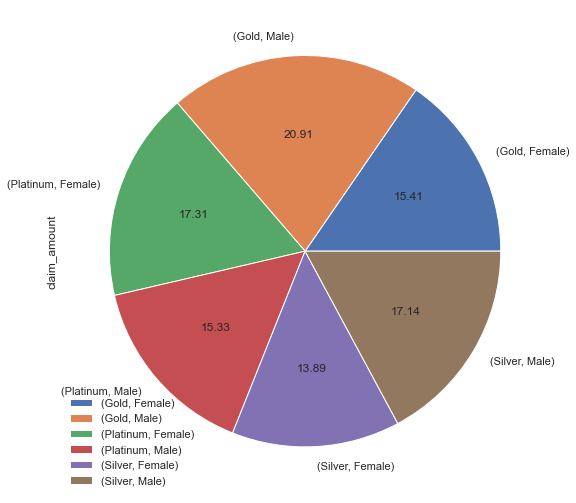

In [40]:
clam_pie=cust_360.groupby(by=["Segment","gender"])[["claim_amount"]].sum()
clam_pie.plot(kind="pie",subplots=True,autopct="%3.2f",figsize=[12,9])
plt.show()

## 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

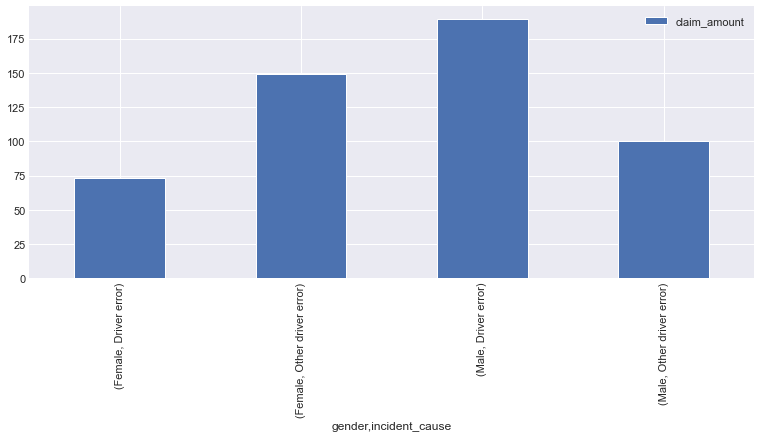

In [43]:
driver_issues=cust_360[(cust_360["incident_cause"]=="Driver error") |(cust_360["incident_cause"]=="Other driver error")]
driver_issues_grp=driver_issues.pivot_table(index=["gender","incident_cause"],values="claim_amount",aggfunc=len)
driver_issues_grp.plot(kind="bar",y="claim_amount",figsize=[13,5])
plt.grid()

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar char

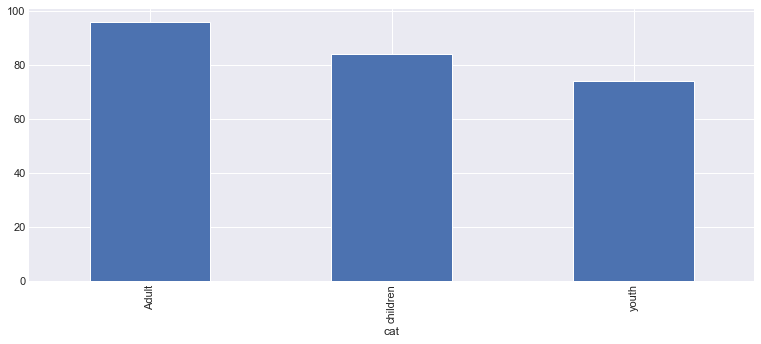

In [45]:
fpc=cust_360[cust_360["fraudulent"]=="Yes"]
fpc_plt=fpc.groupby(by="cat")["claim_amount"].count()
fpc_plt.plot(kind="bar",figsize=[13,5])
plt.grid()

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order

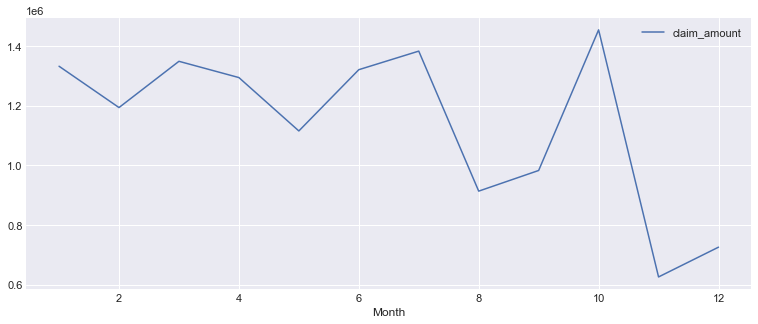

In [46]:
cust_360["Month"]=cust_360["claim_date"].dt.month
monthly_trend=cust_360.groupby(by="Month",sort=True)[["claim_amount"]].sum()
monthly_trend.plot(kind="line",figsize=[13,5])
plt.grid()

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims. Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

In [50]:
cust_360.pivot_table(index="cat",columns="gender",values="claim_amount",aggfunc="mean")
fraudulent=cust_360[cust_360.fraudulent=="Yes"]
non_fraudulent=cust_360[cust_360.fraudulent=="No"]
x=fraudulent.pivot_table(index="cat",columns="gender",values="claim_amount",aggfunc="mean")
y=non_fraudulent.pivot_table(index="cat",columns="gender",values="claim_amount",aggfunc="mean")
x

gender,Female,Male
cat,,
Adult,17910.697927,18749.25782
children,6231.041672,14040.93155
youth,7595.972236,10681.31251


<AxesSubplot:xlabel='cat'>

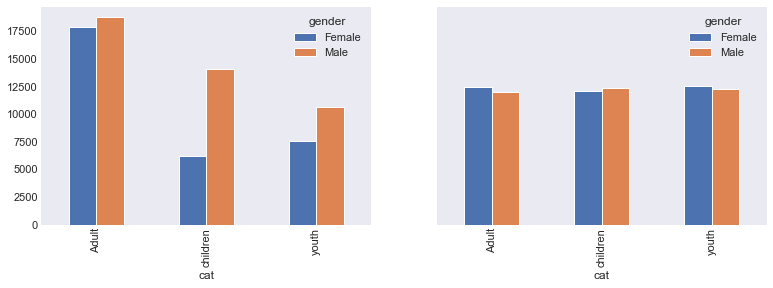

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4),sharey=True)
x.plot.bar(ax=axes[0])
y.plot.bar(ax=axes[1])

## 16. Is there any similarity in the amount claimed by males and females?Two Sample T-Test (Paired)

In [ ]:
m=cust_360[cust_360.gender=="Male"]
f=cust_360[cust_360.gender=="Female"]
print(f'The average claimed by the male is {(m["claim_amount"].mean())}')
print(f'The average claimed by the female  is {(f["claim_amount"].mean())}')

In [54]:
males=cust_360[cust_360.gender=="Male"]
females=cust_360[cust_360.gender=="Female"]
print(f'The average claimed by the males is {(males["claim_amount"].mean())}')
print(f'The average claimed by the females is {(females["claim_amount"].mean())}')

The average claimed by the males is 12795.000007614408
The average claimed by the females is 12061.233702272999


### Stage 1
 H0 : Males claimed == Females claimed
 H1 : Males claimed != Females claimed

In [55]:
stats.ttest_ind(males.claim_amount,females.claim_amount)

Ttest_indResult(statistic=0.910525219359747, pvalue=0.3627454254155197)

### stage 4-conclusion
we Fail to reject NUll hypothesis,so there is similarity between males and females claimed

## 17.Is there any relationship between age category and segment?

### Stage 1
H0 : category == segment
H1 : category!= segment

In [56]:
stats.chi2_contingency(pd.crosstab(cust_360.Segment,cust_360.cat))

(5.070479496234779,
 0.28014200887776347,
 4,
 array([[156.35454545, 119.12727273, 114.51818182],
        [145.12909091, 110.57454545, 106.29636364],
        [139.51636364, 106.29818182, 102.18545455]]))

### stage 4-conclusion
we Fail to reject NUll hypothesis,so there is relationship between category and segment

## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

### One Sample T-Test
### Stage 1
H0 : current year claim amount==10000  
H1 : current year claim amount>10000

In [57]:
cust_360['year']=cust_360.claim_date.dt.year

In [59]:
current_year= cust_360[cust_360['year']==2018]
print(f'The average claimed current year {current_year["claim_amount"].mean()}')

The average claimed current year 12638.007599405428


In [60]:
stats.ttest_1samp(current_year.claim_amount,10000)

Ttest_1sampResult(statistic=4.359707103269088, pvalue=1.5862380370283107e-05)

## stage 4-conclusion
With 99 percemt confidence we reject the null hypothesis, hence we conclude that there has been significant rise in fiscal average

## 19. Is there any difference between age groups and insurance claims?

### ANOVA
### Stage 1
H0 : avg_adult == avg_children == avg_youth
H1 : avg_adult <> avg_children <> avg_youth

In [62]:
adult=cust_360[cust_360.cat=="Adult"]
children=cust_360[cust_360.cat=="children"]
youth=cust_360[cust_360.cat=="youth"]
print(f'The average claimed adult {adult["claim_amount"].mean()}')
print(f'The average claimed children {children ["claim_amount"].mean()}')
print(f'The average claimed youth {youth ["claim_amount"].mean()}')

The average claimed adult 13565.09807968276
The average claimed children 11706.442714803314
The average claimed youth 11674.19389330103


In [63]:
stats.f_oneway(adult.claim_amount,children.claim_amount,youth.claim_amount)

F_onewayResult(statistic=2.6112173756841806, pvalue=0.0739015494649672)

### stage 4-conclusion
with 90 percent confidence interval we reject the null hypothesis, hence we conclude that there is a difference between age group and insurance claimed.

## 20. Is there any relationship between total number of policy claims and the claimed amount?

### ANOVA
### Stage 1
H0 : avg_Total_policy_claims == avg_claimed_amount  
H1 : avg_Total_policy_claims <> avg_claimed_amount

In [64]:
stats.f_oneway(cust_360.total_policy_claims, cust_360.claim_amount)

F_onewayResult(statistic=954.7901938097343, pvalue=2.0528784055091816e-174)

### stage 4-conclusion
with 99 percent confidence interval we reject the null hypothesis, hence we conclude that there is no relationship between claimed amount and total policy claims.